<a href="https://colab.research.google.com/github/Hatsuhinode/ML-Algorithm/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m=100
X=6 * np.random.rand(m,1) - 3
y=0.5 * X**2 +X + 2 + np.random.randn(m,1)

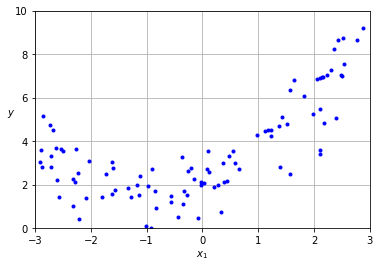

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Using Scikit-
Learn’s *PolynomialFeatures* class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([0.28832718])

include_bias, default=True. If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [ ]:
X_poly[0]

array([0.28832718, 0.08313256])

*X_poly* now contains the original feature of plus the square of this feature.We can fit a model to this extended training data.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.00730438]), array([[0.94734789, 0.51519895]]))

Text(0, 0.5, '$y$')

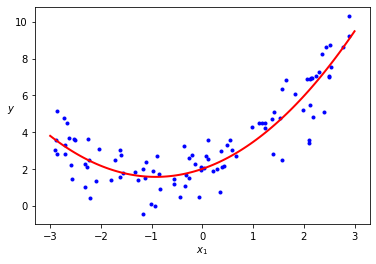

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

When there are multiple features, *Polynomial Regression* is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that *PolynomialFeatures*
also adds all combinations of features up to the given degree.

For example, if there were two features a and b, *PolynomialFeatures*
with degree=3 would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations ab, $a^2$b, and a$b^2$.

---
*PolynomialFeatures(degree=d)* transforms an array containing n features into an
array containing  $ \frac {(n+d)!}{d!n!}$ features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

# Learning curve

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

Learning curves are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).

To generate the plots, train the model several times on different sized subsets of the training set.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]

  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))

  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label="val")
  plt.legend()

### Learning curve of the plain Linear Regression model

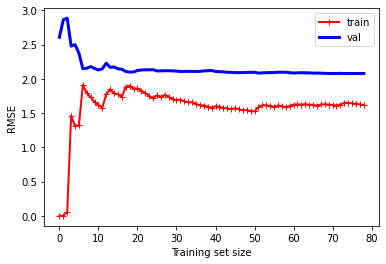

In [ ]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.xlabel('Training set size')
plt.ylabel('RMSE');

---
### Learning curves of a 10th-degree polynomial model

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression())

])

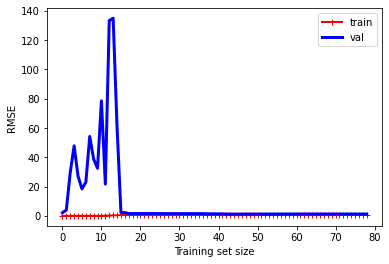

In [ ]:
plot_learning_curves(polynomial_regression,X,y)
plt.xlabel('Training set size')
plt.ylabel('RMSE');

---
### Remember!

#### If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

#### If there is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.

#### One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

---

# Regularized Linear Models

# Ridge Regression

*Ridge Regression* (also called *Tikhonov regularization*) is a regularized version of Linear Regression: a *regularization term* equal to $α Σ_{i=1}^n θ_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

The hyperparameter α controls how much you want to regularize the model. If α = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

**Performing Ridge Regression with Scikit-Learn using a closed- form solution**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.90374651]])

**Performing Ridge Regression using stochastic gradient descent**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.88448298])

The hyperparameter sets the type of regularization term to use.
Specifying *"l2"* indicates that you want SGD to add a regularization term to the cost function equal to half the square of the *l2* norm of the weight vector: this is simply Ridge Regression.


# Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (usually simply called *Lasso Regression*) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the *l1* norm of the weight vector instead of half the square of the *l2* norm.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.85753853])

**You could instead use** *SGDRegressor(penalty="l1")*

# Elastic Net


Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.

**It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.**



In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.86160751])

# Early stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

---
### Note


With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [ ]:
# Preparing the data

poly_scaler=Pipeline([
    ('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler',StandardScaler())
])

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

In [ ]:
sgd_regressor=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

In [ ]:
minimum_val_error=float('inf')
best_epoch=None
best_model=None

In [ ]:
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
  y_val_predict=sgd_reg.predict(X_val_poly_scaled)
  val_error=mean_squared_error(y_val,y_val_predict)

  if val_error < minimum_val_error :
    minimum_val_error=val_error
    best_epoch=epoch
    best_model=clone(sgd_reg)

In [ ]:
best_epoch

445

In [ ]:
minimum_val_error

507.4749845566321

**With** *warm_start=True*, **when the fit method is called it continues training where it left off, instead of restarting from scratch.**